# CIFAR-10 Object Recognition

In [1]:
# Keras
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.transform import resize

# Utility
import time
import os
import itertools
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from IPython import display

import warnings
warnings.simplefilter("ignore", UserWarning)

Using TensorFlow backend.


### Settings

In [2]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10.h5'
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Get Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 113s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


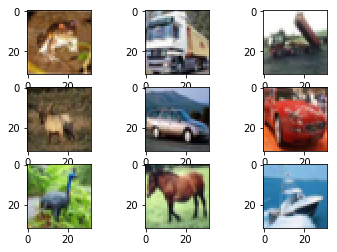

In [4]:
for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    plt.imshow((x_train[i]))
# show the plot
plt.show()

### Prepare labels for trainig

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create model

In [6]:
#create the model
model = Sequential()

#Layer 1
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
__________

### Compile Model

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Prepare input

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Fit model

In [9]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=5, verbose=1, mode='auto')
callbacks_list = [earlystop]

In [10]:
%%time
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=callbacks_list,
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 257us/step - loss: 2.0345 - acc: 0.2383 - val_loss: 1.8228 - val_acc: 0.3503
Epoch 2/100
50000/50000 [==============================] - 11s 214us/step - loss: 1.7221 - acc: 0.3629 - val_loss: 1.6252 - val_acc: 0.4105
Epoch 3/100
50000/50000 [==============================] - 11s 213us/step - loss: 1.5860 - acc: 0.4151 - val_loss: 1.4902 - val_acc: 0.4803
Epoch 4/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.4931 - acc: 0.4548 - val_loss: 1.4171 - val_acc: 0.4956
Epoch 5/100
50000/50000 [==============================] - 11s 213us/step - loss: 1.4322 - acc: 0.4783 - val_loss: 1.3634 - val_acc: 0.5188
Epoch 6/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.3764 - acc: 0.5035 - val_loss: 1.2752 - val_acc: 0.5514
Epoch 7/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.3279 - acc: 0.5224 - val_l

Text(0.5,1,'Accuracy Curves')

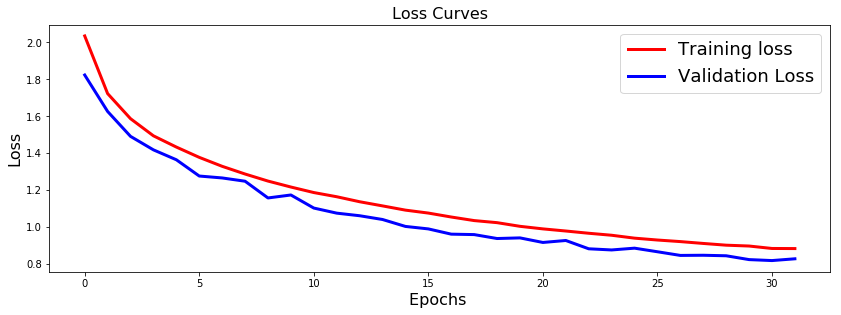

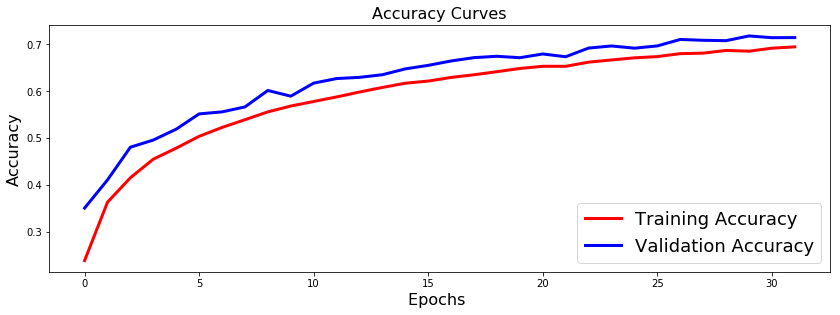

In [11]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Save model

In [12]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /kaggle/working/saved_models/keras_cifar10.h5 


### Predict

In [13]:
def predict(img):
    start_at = time.time()
    prediction = model.predict(np.asarray([img]))
    proba = np.max(prediction)
    label = classes[np.argmax(prediction)]
    
    return {
            "label": label,
            "confidence": proba,
            "elapsed_time": time.time() - start_at
        }

### Random test

{'label': 'frog', 'confidence': 0.5151619, 'elapsed_time': 0.07252216339111328}

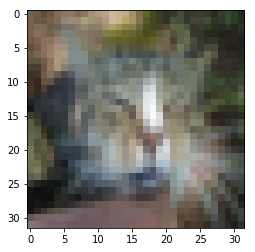

In [14]:
idx = np.random.randint(x_test.shape[0])
plt.imshow(x_test[idx])
predict(x_test[idx])

### Evaluate

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 72us/step
Test loss: 0.8265443470954895
Test accuracy: 0.7143


### Classification report

In [16]:
predictions = model.predict(x_test, verbose=1)

10000/10000 [==============================] - 1s 59us/step


In [17]:
y_true, y_pred = [],[]
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])

In [18]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

    airplane       0.71      0.81      0.76       880
  automobile       0.87      0.82      0.85      1057
        bird       0.45      0.70      0.55       645
         cat       0.48      0.57      0.52       845
        deer       0.74      0.60      0.66      1231
         dog       0.56      0.70      0.62       800
        frog       0.90      0.62      0.73      1456
       horse       0.75      0.78      0.76       959
        ship       0.87      0.77      0.82      1139
       truck       0.81      0.82      0.81       988

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.71      0.72      0.71     10000
weighted avg       0.74      0.71      0.72     10000



### Confusion Matrix

In [19]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(11, 11))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)
    plt.tight_layout()

    plt.show()

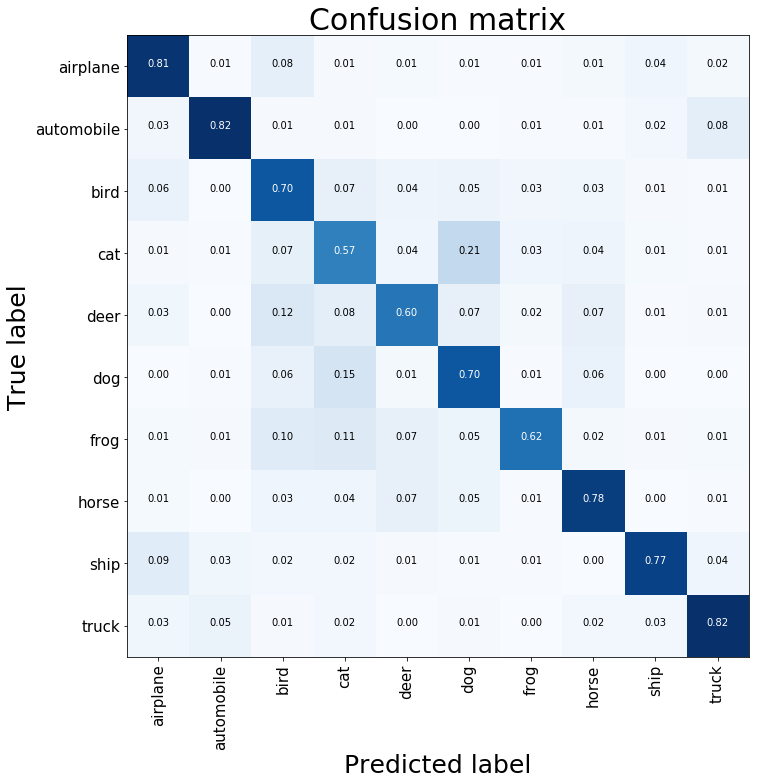

In [20]:
cnf_matrix = confusion_matrix(y_pred, y_true)
cnf_matrix = cnf_matrix.astype(float) / cnf_matrix.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cnf_matrix, classes)

### Test from internet

In [21]:
def predict_by_url(url):
    response = requests.get(url)
    original = Image.open(BytesIO(response.content))
    img = resize(np.asarray(original), (32, 32), anti_aliasing=True)
    return predict(img)    

In [22]:
url1 = "https://www.ttnews.com/sites/default/files/images/articles/usa-truck_0.jpg"
print(predict_by_url(url1))
display.Image(url= url1)

{'label': 'truck', 'confidence': 0.98780197, 'elapsed_time': 0.002551555633544922}


In [23]:
url2 = "https://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2019/02/13/931/524/694940094001_6001731668001_6001731174001-vs.jpg?ve=1&tl=1"
print(predict_by_url(url2))
display.Image(url= url2)

{'label': 'deer', 'confidence': 0.9836986, 'elapsed_time': 0.002164125442504883}


In [24]:
url3 = "https://robbreportedit.files.wordpress.com/2018/03/the-hinckley-sport-boat_water.jpg?w=1024"
print(predict_by_url(url3))
display.Image(url= url3)

{'label': 'ship', 'confidence': 0.99889165, 'elapsed_time': 0.002715587615966797}


In [25]:
url4 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXh3S5Vzu0Vx-yRTdo4UfbQsuhFtaqjiMAlKrTcFmN9JgSSiD_Lw"
print(predict_by_url(url4))
display.Image(url= url4)

{'label': 'frog', 'confidence': 0.9995958, 'elapsed_time': 0.0019588470458984375}


In [26]:
url5 = "https://cdn.theatlantic.com/assets/media/img/mt/2018/07/AP_18191475093432-1/lead_720_405.jpg?mod=1533691454"
print(predict_by_url(url5))
display.Image(url= url5)

{'label': 'airplane', 'confidence': 0.96049356, 'elapsed_time': 0.002075672149658203}
